<a href="https://colab.research.google.com/github/paulovictorcorreia/nn-discipline/blob/master/Lista_1_de_redes_neurais.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lista 1 de redes neurais

Questao 1 iii

## Questão 5

In [0]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import make_scorer, accuracy_score
from scipy import stats
import numpy as np
import pandas as pd

seed = 42
np.random.seed(seed)

mean, std = 0, 0.4
size = 1024
white_noise2 = stats.norm.rvs(mean, std, size)
white_noise1 = stats.norm.rvs(mean, std, size)
white_noise0 = stats.norm.rvs(mean, std, size)

bit_2 = np.random.randint(0, 2, size)
bit_1 = np.random.randint(0, 2, size)
bit_0 = np.random.randint(0, 2, size)

bin2dec = lambda x, y, z: int(str(x) + str(y) + str(z), 2)

output_real = np.array(list(map(bin2dec, bit_2, bit_1, bit_0)))
output_real[:10]

array([5, 7, 4, 4, 1, 2, 0, 1, 4, 4])

In [0]:
bit_2_noisy = bit_2 + white_noise2
bit_1_noisy = bit_1 + white_noise1
bit_0_noisy = bit_0 + white_noise0


cube_df = pd.DataFrame(np.array([bit_2_noisy, bit_1_noisy, bit_0_noisy]).transpose(), 
                       columns=["bit_2", "bit_1", "bit_0"])
cube_df["target"] = output_real
cube_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1024 entries, 0 to 1023
Data columns (total 4 columns):
bit_2     1024 non-null float64
bit_1     1024 non-null float64
bit_0     1024 non-null float64
target    1024 non-null int64
dtypes: float64(3), int64(1)
memory usage: 32.1 KB


In [0]:
X_train, X_test, y_train, y_test = train_test_split(cube_df.drop("target", axis=1),
                                                    cube_df["target"], shuffle=True,
                                                    test_size=0.25, stratify=cube_df["target"])


sgd_clf = SGDClassifier(loss="hinge", learning_rate="optimal",
                        random_state=seed, n_jobs=-1, max_iter=2000)
search_space = {
    "alpha": [0.5, 0.1, 0.01, 0.005, 0.0001, 0.00001],
    "eta0": [0.5, 0.1, 0.01, 0.005, 0.0001, 0.00001],
    "learning_rate": ["optimal", "constant"],
    "loss" : ["hinge", "squared_hinge"],
}

acc_score = make_scorer(accuracy_score)
kfold = StratifiedKFold(n_splits=10)


clf = GridSearchCV(estimator=sgd_clf, param_grid=search_space,
                   scoring=acc_score, cv=kfold,
                   return_train_score=True)
clf.fit(X_train, y_train)





/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_mo

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
             error_score=nan,
             estimator=SGDClassifier(alpha=0.0001, average=False,
                                     class_weight=None, early_stopping=False,
                                     epsilon=0.1, eta0=0.0, fit_intercept=True,
                                     l1_ratio=0.15, learning_rate='optimal',
                                     loss='hinge', max_iter=2000,
                                     n_iter_no_change=5, n_jobs=-1,
                                     penalty='l2', power_t=0.5, random_s...
                                     validation_fraction=0.1, verbose=0,
                                     warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.5, 0.1, 0.01, 0.005, 0.0001, 1e-05],
                         'eta0': [0.5, 0.1, 0.01, 0.005, 0.0001, 1e-05],
                         'learning_rate': ['optimal', 'cons

In [0]:
results = pd.DataFrame(clf.cv_results_)
results = results.sort_values("mean_test_score", ascending=False)
results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_eta0,param_learning_rate,param_loss,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
63,0.103995,0.000120,0.001521,0.000054,0.01,0.005,constant,squared_hinge,"{'alpha': 0.01, 'eta0': 0.005, 'learning_rate'...",0.740260,0.766234,0.701299,0.727273,0.805195,0.688312,0.766234,0.688312,0.684211,0.750000,0.731733,0.038935,1,0.736614,0.740955,0.743849,0.748191,0.726483,0.746744,0.736614,0.740955,0.742775,0.744220,0.740740,0.005957
135,0.104002,0.000103,0.001509,0.000024,1e-05,0.005,constant,squared_hinge,"{'alpha': 1e-05, 'eta0': 0.005, 'learning_rate...",0.740260,0.740260,0.714286,0.727273,0.779221,0.688312,0.766234,0.688312,0.684211,0.750000,0.727837,0.031822,2,0.732272,0.720695,0.742402,0.746744,0.739508,0.748191,0.736614,0.742402,0.750000,0.747110,0.740594,0.008457
111,0.103959,0.000062,0.001502,0.000052,0.0001,0.005,constant,squared_hinge,"{'alpha': 0.0001, 'eta0': 0.005, 'learning_rat...",0.740260,0.740260,0.714286,0.727273,0.779221,0.688312,0.766234,0.688312,0.684211,0.750000,0.727837,0.031822,2,0.732272,0.720695,0.742402,0.746744,0.739508,0.748191,0.736614,0.742402,0.751445,0.747110,0.740738,0.008627
87,0.103970,0.000103,0.001525,0.000059,0.005,0.005,constant,squared_hinge,"{'alpha': 0.005, 'eta0': 0.005, 'learning_rate...",0.727273,0.753247,0.714286,0.727273,0.792208,0.688312,0.766234,0.688312,0.671053,0.750000,0.727820,0.036453,4,0.733719,0.727931,0.746744,0.748191,0.740955,0.746744,0.739508,0.739508,0.745665,0.745665,0.741463,0.006224
1,0.104202,0.000508,0.001530,0.000044,0.5,0.5,optimal,squared_hinge,"{'alpha': 0.5, 'eta0': 0.5, 'learning_rate': '...",0.727273,0.753247,0.714286,0.766234,0.753247,0.636364,0.779221,0.675325,0.671053,0.776316,0.725256,0.047141,5,0.738061,0.730825,0.730825,0.726483,0.723589,0.742402,0.717800,0.726483,0.738439,0.722543,0.729745,0.007490


In [0]:
accuracy_score(y_test, clf.best_estimator_.predict(X_test))

0.6796875

In [0]:
clf.best_params_

{'alpha': 0.01,
 'eta0': 0.005,
 'learning_rate': 'constant',
 'loss': 'squared_hinge'}

## Questão 6

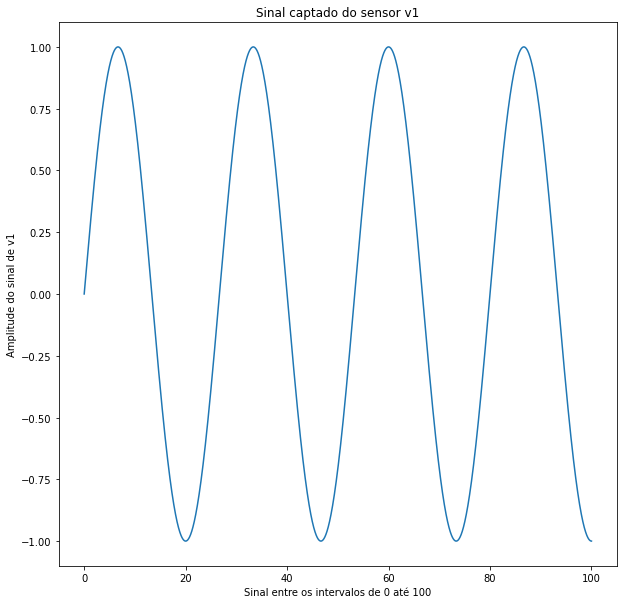

In [0]:
import numpy as np
import scipy.stats as stats
from sklearn.linear_model import Perceptron
import matplotlib.pyplot as plt
from scipy.ndimage.interpolation import shift

size_signal = 5000
espaco_amostral = np.linspace(0, 100, size_signal)
sn_fonte = np.sin(0.075*espaco_amostral*np.pi)

plt.figure(figsize=(10, 10))
plt.plot(espaco_amostral, sn_fonte)
plt.xlabel("Sinal entre os intervalos de 0 até 100")
plt.ylabel("Amplitude do sinal de v1")
plt.title("Sinal captado do sensor v1")
plt.show()

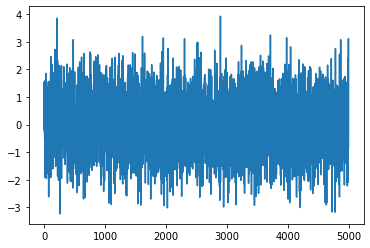

In [0]:
white_noise = stats.norm(0, 1).rvs(size_signal, random_state=42)
white_noise_delay = shift(white_noise, 1)
plt.plot(white_noise)
plt.show()

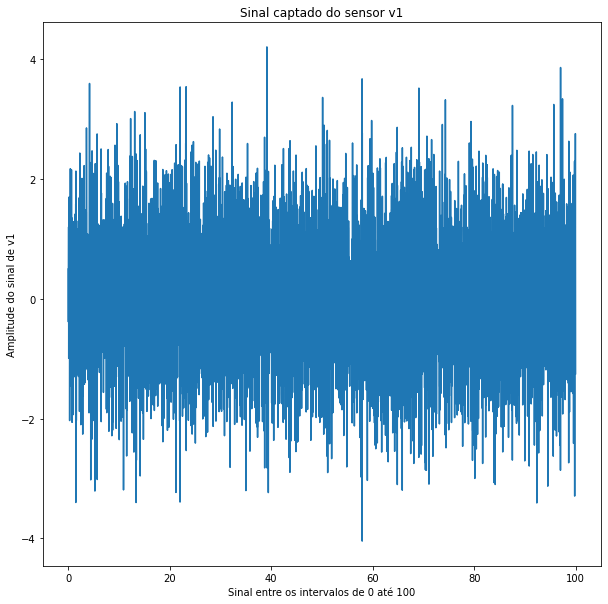

In [0]:
#v1 = np.sin(2*espaco_amostral*np.pi)
v1 = -0.5*white_noise_delay + white_noise

plt.figure(figsize=(10, 10))
plt.plot(espaco_amostral, v1)
plt.xlabel("Sinal entre os intervalos de 0 até 100")
plt.ylabel("Amplitude do sinal de v1")
plt.title("Sinal captado do sensor v1")
plt.show()
#np.testing.assert_array_equal(v1, white_noise)

In [0]:
v1.std()

1.1197646188369084

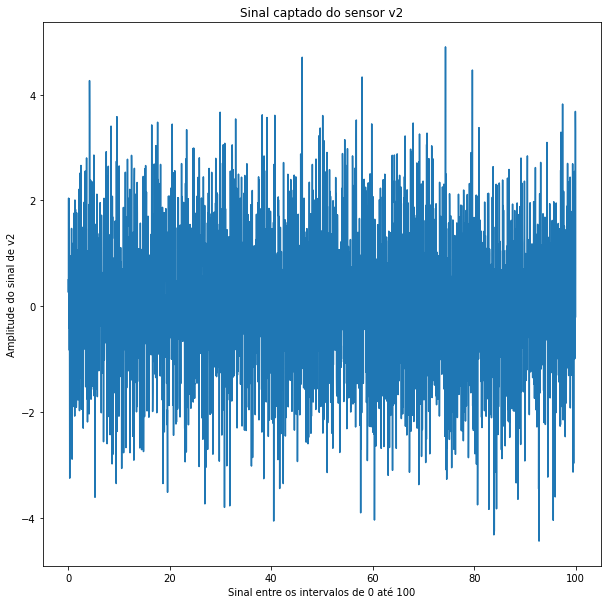

In [0]:
#v2 = np.cos(0.5*espaco_amostral*np.pi)
v2 = 0.8*shift(white_noise, 1) + white_noise

plt.figure(figsize=(10, 10))
plt.plot(espaco_amostral, v2)
plt.xlabel("Sinal entre os intervalos de 0 até 100")
plt.ylabel("Amplitude do sinal de v2")
plt.title("Sinal captado do sensor v2")
plt.show()
#np.testing.assert_array_equal(v1, white_noise)

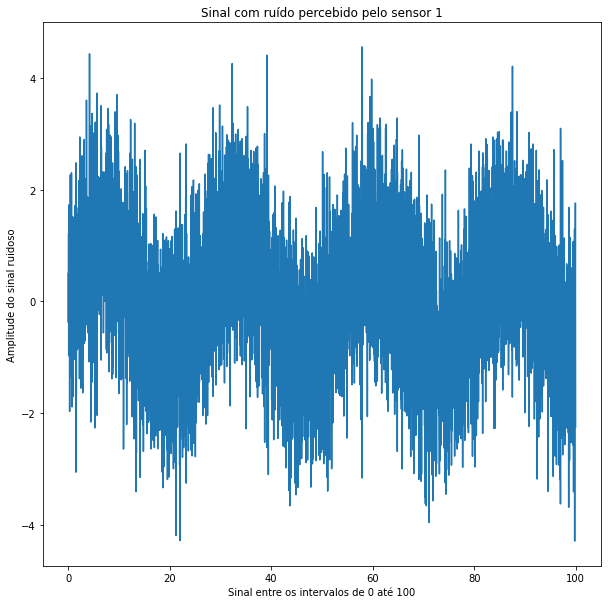

In [0]:
noisy_signal = sn_fonte + v1

plt.figure(figsize=(10, 10))
plt.plot(espaco_amostral, noisy_signal)
plt.xlabel("Sinal entre os intervalos de 0 até 100")
plt.ylabel("Amplitude do sinal ruidoso")
plt.title("Sinal com ruído percebido pelo sensor 1")
plt.show()

Erro de RMSE teste é: 0.23600475920264385
Erro de RMSE treinamento é: 0.23389972629296216


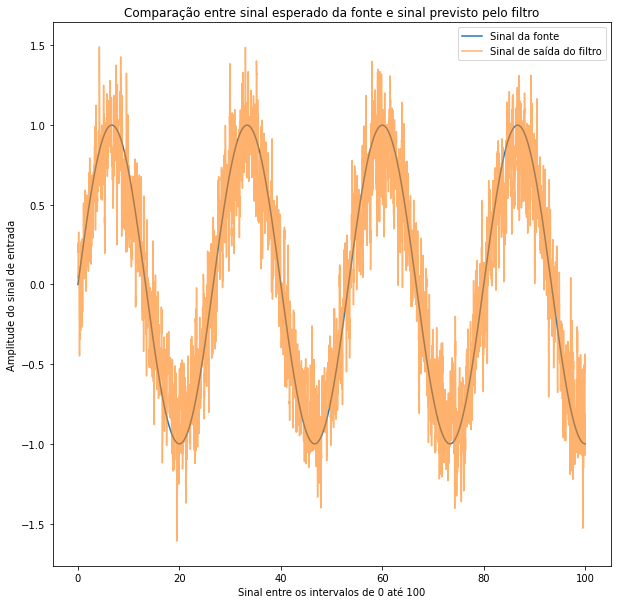

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import SGDRegressor
perceptron = SGDRegressor(learning_rate="constant", eta0=0.0015)
#perceptron = Perceptron(eta0=0.00015)
X = [shift(noisy_signal, i) for i in range(6)]
X = np.array(X).transpose()
X_train, X_test, y_train, y_test = train_test_split(X, sn_fonte, 
                                                    shuffle=True,
                                                    random_state=42, test_size=0.25)
perceptron.fit(X_train, y_train)
y_pred = perceptron.predict(X_test)
print(f"Erro de RMSE teste é: {np.sqrt(mean_squared_error(y_test, y_pred))}")
print(f"Erro de RMSE treinamento é: {np.sqrt(mean_squared_error(y_train, perceptron.predict(X_train)))}")
plt.figure(figsize=(10, 10))
plt.plot(espaco_amostral, sn_fonte, label="Sinal da fonte")
plt.plot(espaco_amostral, perceptron.predict(X), alpha=0.6, label="Sinal de saída do filtro")
plt.xlabel("Sinal entre os intervalos de 0 até 100")
plt.ylabel("Amplitude do sinal de entrada")
plt.title("Comparação entre sinal esperado da fonte e sinal previsto pelo filtro")
plt.legend(loc="best")
plt.show()


## Questão 8

### Item a

In [0]:
import numpy as np
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.model_selection import train_test_split, GridSearchCV

x1 = np.array([(0 if i < 4 else 1) for i in range(8)])
x2 = np.array([(0 if i in [0, 1, 4, 5] else 1) for i in range(8)])
x3 = np.array([(0 if i % 2 == 0 else 1) for i in range(8)])
print(x1)
print(x2)
print(x3)

truth_table = np.array([x1, x2, x3]).transpose()

result = np.logical_xor(truth_table[:, 0], truth_table[:, 1])
result = np.logical_xor(result, truth_table[:, 2])
print(truth_table)
print(result)

[0 0 0 0 1 1 1 1]
[0 0 1 1 0 0 1 1]
[0 1 0 1 0 1 0 1]
[[0 0 0]
 [0 0 1]
 [0 1 0]
 [0 1 1]
 [1 0 0]
 [1 0 1]
 [1 1 0]
 [1 1 1]]
[False  True  True False  True False False  True]


In [0]:
mlp1 = MLPClassifier(max_iter=2000, random_state=42)
search_space = {
    "hidden_layer_sizes": [(100), (10, 10, 10), (10,), (4, 4), (7, 5, 6)],
    "activation": ["logistic", "tanh"],
    "solver": ["sgd", "lbfgs"],
    "learning_rate_init": [0.5, 0.1, 0.05, 0.005, 0.0005]
}
clf = GridSearchCV(mlp1, param_grid=search_space, verbose=0, cv=2, return_train_score=True)
clf.fit(truth_table, result)
print(f"The score of the best mlp is: {clf.best_score_}")
print(f"With the following parameters: {clf.best_params_}")

The score of the best mlp is: 0.625
With the following parameters: {'activation': 'tanh', 'hidden_layer_sizes': 100, 'learning_rate_init': 0.0005, 'solver': 'sgd'}


### Item 2

In [0]:
from sklearn.model_selection import validation_curve
from sklearn.tree import DecisionTreeRegressor
size = 1000
x1 = np.random.uniform(-4*np.pi, 4*np.pi, size)
x2 = np.random.uniform(-4*np.pi, 4*np.pi, size)
x3 = np.ones(size)
x4 = np.ones(size)
X = np.array([x1, x2]).transpose()
X = X.round(decimals=6)
y1 = (np.cos(2*np.pi*X[:, 0])/(1-(4*X[:, 0])**2)*np.sin(np.pi*X[:, 0])/(np.pi*X[:, 0]))
y2 = (np.cos(2*np.pi*X[:, 1])/(1-(4*X[:, 1])**2)*np.sin(np.pi*X[:, 1])/(np.pi*X[:, 1]))
#y1 = np.ones(size)
#y2 = np.ones(size)
y = y1*y2
#print(X[:, 1])
#print(type(X_))
#print(y.shape)
#print(X)

In [0]:

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.25,
                                                    random_state=45)

hidden_layer_sizes_list = [(100), (10, 10, 10),
                           (5, 5), (7, 5, 6),
                           (100, 100, 100, 100, 100), (4, 3, 2),
                           (3, 3, 3, 3, 3, 3)]
mlp2 = MLPRegressor(max_iter=1000, random_state=42, learning_rate="constant")
search_space = {
    "hidden_layer_sizes": hidden_layer_sizes_list,
    "activation": ["relu", "logistic", "tanh", "identity"],
    "solver": ["sgd", "adam", "lbfgs"],
    "alpha":  [0.005, 0.1, 0.01, 0.005, 0.0001, 0.00001],
}

rgr = GridSearchCV(estimator=mlp2, param_grid=search_space, 
                   cv=5, n_jobs=-1,
                   return_train_score=True)
rgr.fit(X_train, y_train)
y_pred = rgr.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
#rmse_train
best_score = rgr.best_score_
best_params = rgr.best_params_
#best_estimator = rgr.best_estimator_
#print(f"The test score of the model is: {rmse}")
print(f"The best test score is: {np.sqrt(np.abs(best_score))}")
print(f"The best parameters on the search grid are: {best_params}")


The best test score is: 16.902714134117133
The best parameters on the search grid are: {'activation': 'identity', 'alpha': 0.1, 'hidden_layer_sizes': (10, 10, 10), 'solver': 'sgd'}


In [0]:
import pandas as pd
best_estimator = rgr.best_estimator_
results = pd.DataFrame(rgr.cv_results_)
results = results.sort_values("mean_test_score", ascending=False)
results["mean_test_score"] = np.sqrt(np.abs(results["mean_test_score"])) 
results["mean_train_score"] = np.sqrt(np.abs(results["mean_train_score"])) 
results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_activation,param_alpha,param_hidden_layer_sizes,param_solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
402,0.057546,0.001112,0.001092,0.000029,identity,0.1,"(10, 10, 10)",sgd,"{'activation': 'identity', 'alpha': 0.1, 'hidd...",-0.016594,-1343.905903,-81.346415,-0.028953,-3.210859,16.902714,530.015696,1,-0.013027,-0.009195,-0.005767,-0.041469,-0.007504,0.124066,0.013258
423,0.058940,0.002866,0.001088,0.000037,identity,0.01,"(10, 10, 10)",sgd,"{'activation': 'identity', 'alpha': 0.01, 'hid...",-0.016859,-1470.290401,-88.689815,-0.029147,-3.668767,17.678773,579.867240,2,-0.013285,-0.009385,-0.005920,-0.042310,-0.007676,0.125361,0.013519
381,0.057250,0.001181,0.001078,0.000018,identity,0.005,"(10, 10, 10)",sgd,"{'activation': 'identity', 'alpha': 0.005, 'hi...",-0.016873,-1477.478025,-89.277624,-0.029158,-3.695159,17.722849,582.689180,3,-0.013299,-0.009396,-0.005929,-0.042357,-0.007686,0.125432,0.013534
444,0.059479,0.001023,0.001123,0.000011,identity,0.005,"(10, 10, 10)",sgd,"{'activation': 'identity', 'alpha': 0.005, 'hi...",-0.016873,-1477.478025,-89.277624,-0.029158,-3.695159,17.722849,582.689180,3,-0.013299,-0.009396,-0.005929,-0.042357,-0.007686,0.125432,0.013534
465,0.061319,0.004516,0.001073,0.000017,identity,0.0001,"(10, 10, 10)",sgd,"{'activation': 'identity', 'alpha': 0.0001, 'h...",-0.016888,-1484.538863,-89.872029,-0.029169,-3.721121,17.766137,585.460035,5,-0.013313,-0.009407,-0.005937,-0.042403,-0.007695,0.125503,0.013548


In [0]:
from sklearn.model_selection import learning_curve
train_sizes = [1, 100, 200, 300, 400, 500, 600, 750]
train_sizes, train_scores, validation_scores = learning_curve(estimator = best_estimator,
                                                              X = X,
                                                              y = y, train_sizes = train_sizes, cv = 10, 
                                                              scoring = 'neg_mean_squared_error')
    
print(train_sizes)
print(train_scores)
print(validation_scores)
#plt.plot(train_scores, list(range(size)), label="Training score")

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarni

[  1 100 200 300 400 500 600 750]
[[-7.61851014e-05 -1.20714830e-04 -1.20714830e-04 -1.20714830e-04
  -1.20714830e-04 -1.20714830e-04 -1.20714830e-04 -1.20714830e-04
  -1.20714830e-04 -1.20714830e-04]
 [-3.18294576e-02 -3.21306031e-02 -3.21306031e-02 -3.21306031e-02
  -3.21306031e-02 -3.21306031e-02 -3.21306031e-02 -3.21306031e-02
  -3.21306031e-02 -3.21306031e-02]
 [-3.22296854e-02 -3.19010349e-02 -3.22102670e-02 -3.22102670e-02
  -3.22102670e-02 -3.22102670e-02 -3.22102670e-02 -3.22102670e-02
  -3.22102670e-02 -3.22102670e-02]
 [-4.47295724e-03 -3.75746553e-03 -2.90806371e-03 -3.62952795e-03
  -3.62952795e-03 -3.62952795e-03 -3.62952795e-03 -3.62952795e-03
  -3.62952795e-03 -3.62952795e-03]
 [-4.76214568e-03 -4.35188160e-03 -4.00475137e-03 -4.64781064e-03
  -3.76507235e-03 -3.76507235e-03 -3.76507235e-03 -3.76507235e-03
  -3.76507235e-03 -3.76507235e-03]
 [-1.31754572e-03 -1.32239809e-03 -1.01997328e-03 -1.32288356e-03
  -7.66978325e-04 -8.73533150e-04 -8.73533150e-04 -8.73533150e-04

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


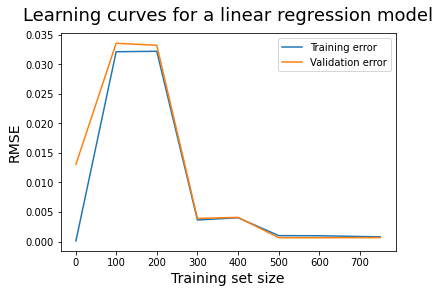

In [0]:
train_scores_mean = -train_scores.mean(axis = 1)
validation_scores_mean = -validation_scores.mean(axis = 1)
plt.plot(train_sizes, train_scores_mean, label = 'Training error')
plt.plot(train_sizes, validation_scores_mean, label = 'Validation error')
plt.ylabel('RMSE', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for a linear regression model', fontsize = 18, y = 1.03)
plt.legend()

### Item 3

(1000, 2)


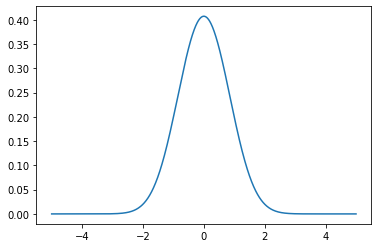

In [0]:
#x = np.zeros((2, 1))
m1 = np.zeros((2, 1))
m2 = np.array([0.5, 0.5]).reshape(2, 1)
m3 = np.array([-0.5, -0.5]).reshape(2, 1)
C = np.eye(2)
m_list = [m1, m2, m3]
size = 1000
x1 = np.linspace(-5, 5, size)
x2 = np.linspace(-5, 5, size)
x = np.array([x1, x2]).transpose()
print(x.shape)
multiplier = 1/(2*np.pi*np.sqrt(np.linalg.det(C)))
y = np.zeros(size)
for i, y_val in enumerate(y):
    for mi in m_list:
        expoente1 = -0.5*(x[i, :].reshape(2, 1) - mi).transpose()
        expoente2 = x[i, :].reshape(2, 1) - mi
        neper = np.exp(expoente1@np.linalg.inv(C)@expoente2)
        y_val += neper
    y[i] = multiplier * y_val
plt.plot(x[:, 0], y)


In [0]:
from sklearn.metrics import make_scorer
X_train, X_test, y_train, y_test = train_test_split(x, y, shuffle=True,
                                                    test_size=0.25,
                                                    random_state=45)
mlp3 = MLPRegressor(max_iter=1000, random_state=42, learning_rate="constant")
hidden_layer_sizes_list = [(100), (10, 10, 10),
                           (5, 5), (7, 5, 6),
                           (100, 100, 100, 100, 100), (4, 3, 2),
                           (3, 3, 3, 3, 3, 3)]

search_space = {
    "hidden_layer_sizes": hidden_layer_sizes_list,
    "activation": ["relu", "logistic", "tanh", "identity"],
    "solver": ["sgd", "adam", "lbfgs"],
    "alpha":  [0.005, 0.1, 0.01, 0.005, 0.0001, 0.00001],
}

rgr = GridSearchCV(estimator=mlp3, param_grid=search_space,
                   cv=5, n_jobs=-1,
                   return_train_score=True,
                   scoring=make_scorer(mean_squared_error))

rgr.fit(X_train, y_train)
y_pred = rgr.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
#rmse_train
best_score = rgr.best_score_
best_params = rgr.best_params_
best_estimator = rgr.best_estimator_
print(f"The test score of the model is: {rmse}")
print(f"The best training score is: {np.sqrt(np.abs(best_score))}")
print(f"The best parameters on the search grid are: {best_params}")


'''
rmse_test_list = []
model_list = []
for layer_size in hidden_layer_sizes_list:
    mlp3 = MLPRegressor(hidden_layer_sizes=layer_size, max_iter=1000,
                        random_state=42, activation="relu",
                        solver="sgd")
    mlp3.fit(X_train, y_train)
    y_pred = mlp3.predict(X_test)
    rmse_test_list.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    model_list.append(mlp3)
    mlp3 = None
for i, model in enumerate(model_list):
    print(f"Model {i+1}:")
    print(f"Test score: {rmse_test_list[i]}")
    print(f"Parameters: {model.hidden_layer_sizes}")
    print()
'''


The test score of the model is: 0.14784299472738532
The best training score is: 0.15310596524696032
The best parameters on the search grid are: {'activation': 'tanh', 'alpha': 1e-05, 'hidden_layer_sizes': (3, 3, 3, 3, 3, 3), 'solver': 'sgd'}


'\nrmse_test_list = []\nmodel_list = []\nfor layer_size in hidden_layer_sizes_list:\n    mlp3 = MLPRegressor(hidden_layer_sizes=layer_size, max_iter=1000,\n                        random_state=42, activation="relu",\n                        solver="sgd")\n    mlp3.fit(X_train, y_train)\n    y_pred = mlp3.predict(X_test)\n    rmse_test_list.append(np.sqrt(mean_squared_error(y_test, y_pred)))\n    model_list.append(mlp3)\n    mlp3 = None\nfor i, model in enumerate(model_list):\n    print(f"Model {i+1}:")\n    print(f"Test score: {rmse_test_list[i]}")\n    print(f"Parameters: {model.hidden_layer_sizes}")\n    print()\n'

In [0]:
results = rgr.cv_results_
results = pd.DataFrame(results)
results = results.sort_values("mean_test_score", ascending=False)
results["mean_test_score"] = np.sqrt(np.abs(results["mean_test_score"])) 
results["mean_train_score"] = np.sqrt(np.abs(results["mean_train_score"])) 
results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_activation,param_alpha,param_hidden_layer_sizes,param_solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
375,0.139419,0.002510,0.000904,0.000035,tanh,1e-05,"(3, 3, 3, 3, 3, 3)",sgd,"{'activation': 'tanh', 'alpha': 1e-05, 'hidden...",0.023432,0.021619,0.025369,0.023999,0.022788,0.153106,0.001247,1,0.023499,0.024058,0.022884,0.023004,0.023533,0.152956,0.00042
354,0.139709,0.002785,0.000953,0.000013,tanh,0.0001,"(3, 3, 3, 3, 3, 3)",sgd,"{'activation': 'tanh', 'alpha': 0.0001, 'hidde...",0.023432,0.021619,0.025368,0.023999,0.022788,0.153106,0.001247,2,0.023499,0.024058,0.022884,0.023004,0.023533,0.152956,0.00042
270,0.137951,0.002615,0.000926,0.000021,tanh,0.005,"(3, 3, 3, 3, 3, 3)",sgd,"{'activation': 'tanh', 'alpha': 0.005, 'hidden...",0.023430,0.021617,0.025367,0.023998,0.022787,0.153101,0.001247,3,0.023497,0.024056,0.022883,0.023002,0.023532,0.152951,0.00042
333,0.139084,0.003260,0.000907,0.000010,tanh,0.005,"(3, 3, 3, 3, 3, 3)",sgd,"{'activation': 'tanh', 'alpha': 0.005, 'hidden...",0.023430,0.021617,0.025367,0.023998,0.022787,0.153101,0.001247,3,0.023497,0.024056,0.022883,0.023002,0.023532,0.152951,0.00042
312,0.161241,0.010067,0.001795,0.001670,tanh,0.01,"(3, 3, 3, 3, 3, 3)",sgd,"{'activation': 'tanh', 'alpha': 0.01, 'hidden_...",0.023428,0.021616,0.025366,0.023996,0.022786,0.153096,0.001247,5,0.023496,0.024055,0.022881,0.023001,0.023530,0.152946,0.00042


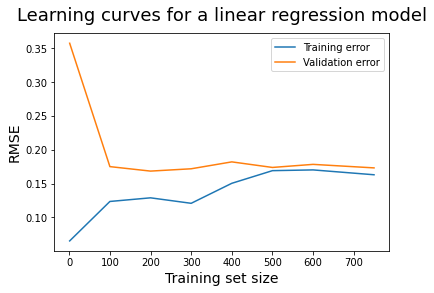

In [0]:
from sklearn.model_selection import learning_curve
train_sizes = [1, 100, 200, 300, 400, 500, 600, 750]
train_sizes, train_scores, validation_scores = learning_curve(estimator = best_estimator,
                                                              X = X,
                                                              y = y, train_sizes = train_sizes, cv = 10, 
                                                              scoring = 'neg_mean_squared_error')
    
#print(train_sizes)
#print(train_scores)
#print(validation_scores)
#plt.plot(train_scores, list(range(size)), label="Training score")
train_scores_mean = -train_scores.mean(axis = 1)
train_scores_mean = np.sqrt(train_scores_mean)
validation_scores_mean = -validation_scores.mean(axis = 1)
validation_scores_mean = np.sqrt(validation_scores_mean)
plt.plot(train_sizes, train_scores_mean, label = 'Training error')
plt.plot(train_sizes, validation_scores_mean, label = 'Validation error')
plt.ylabel('RMSE', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for a linear regression model', fontsize = 18, y = 1.03)
plt.legend()

## Questão 9

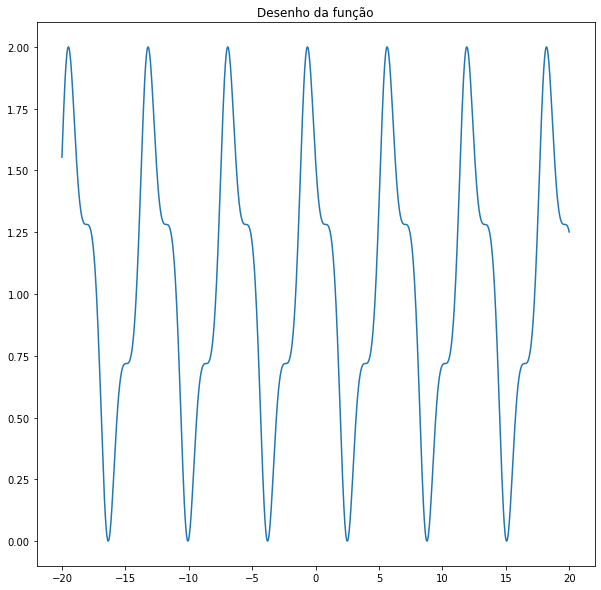

In [0]:
import matplotlib.pyplot as plt
time_series = lambda n : 1 + np.cos(n + np.cos(n)**2)
size = 1100
n = np.linspace(-20, 20, size)
plt.figure(figsize=(10, 10))
plt.plot(n, time_series(n))
plt.title("Desenho da função")
plt.show()

In [0]:
#preparing input data
n_samples = n[:1000]
n_samples1 = shift(n_samples, 1)
n_samples2 = shift(n_samples, 2)
n_samples3 = shift(n_samples, 3)
amplitude = time_series(n_samples)

delayed_samples = [n_samples, n_samples1, n_samples2, n_samples3]

The mean of test of model with 1 delays is: 0.8266080397151443
The standard deviation of test of model with 1 delays is: 0.34906292547024825

The mean of test of model with 2 delays is: 0.8957727205454292
The standard deviation of test of model with 2 delays is: 0.556441400341157

The mean of test of model with 3 delays is: 0.7945894969368157
The standard deviation of test of model with 3 delays is: 0.2504576706225836



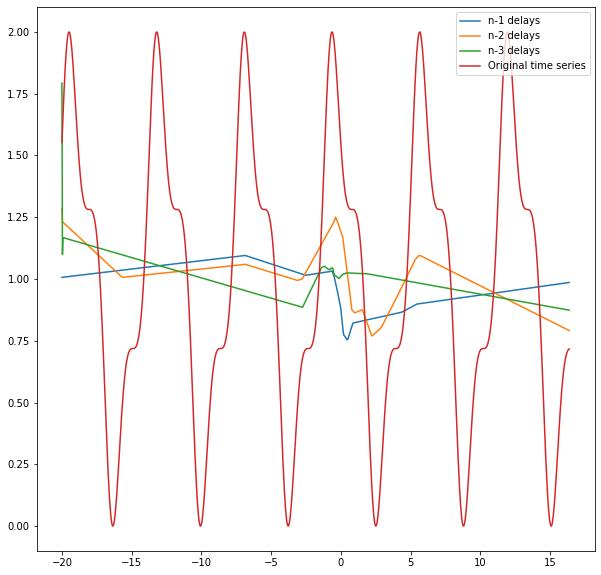

In [0]:
from sklearn.model_selection import TimeSeriesSplit, cross_val_score
from sklearn.metrics import make_scorer

mse = make_scorer(mean_squared_error)
samples_to_use = [n_samples]
models_list = []
models_test_performance = []
models_test_std = []
x_use_list = []
plt.figure(figsize=(10, 10))
for i, samples in enumerate(delayed_samples):
    if i >= 3: break
    samples_to_use.append(samples)
    #print(samples_to_use)
    tss = TimeSeriesSplit(n_splits=10)
    mlp = MLPRegressor(max_iter=2000, random_state=42,
                       learning_rate="constant",
                       alpha=0.01, hidden_layer_sizes=(10, 10),
                       activation="relu",
                       solver="sgd")
    x_use = np.array(samples_to_use).transpose()
    x_use_list.append(x_use)
    #print(x_use)
    score = cross_val_score(estimator=mlp,
                            X=x_use, y=amplitude, 
                            scoring=mse, cv=tss, n_jobs=-1,)
    std_root_mean = np.std(np.sqrt(score))
    score_root_mean = np.mean(np.sqrt(score))
    models_test_performance.append(score_root_mean)
    models_test_std.append(std_root_mean)
    models_list.append(mlp)
    mlp.fit(x_use, amplitude)
    plt.plot(n_samples, mlp.predict(x_use), label=f"n-{i+1} delays")
plt.plot(n_samples, amplitude, label="Original time series")
plt.legend(loc="best")
for i in range(3):
    print(f"The mean of test of model with {i+1} delays is: {models_test_performance[i]}")
    print(f"The standard deviation of test of model with {i+1} delays is: {models_test_std[i]}\n")


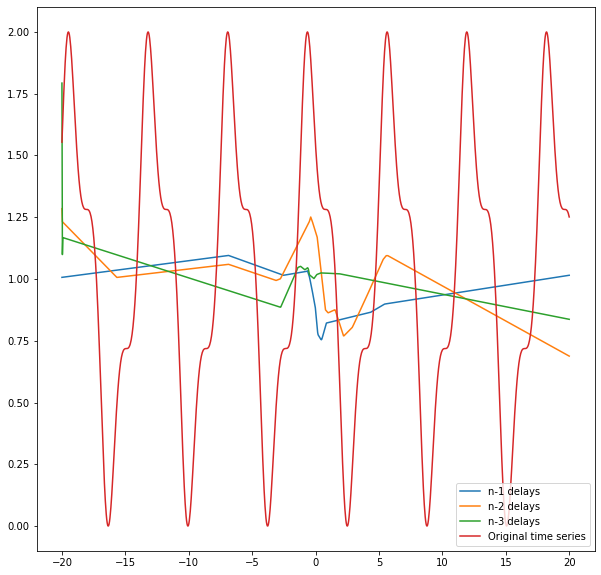

In [0]:
for i, model in enumerate(models_list):
    model.fit(x_use_list[i], amplitude)
'''    
plt.plot(n, y_pred, label=f"n-{i+1} delays")
plt.plot(n, amplitude, label="Original time series")
plt.legend(loc=best)
plt.show()'''
plt.figure(figsize=(10, 10))
samples_to_use = [n]
delayed_samples_plot = [n if i == 0 else shift(n, i) for i in range(4)]
for i, samples in enumerate(delayed_samples_plot):
    samples_to_use.append(samples)
    x_use = np.array(samples_to_use).transpose()
    x_use_list.append(x_use)
    if i>= 3: break
    y_pred = models_list[i].predict(x_use)
    plt.plot(n, y_pred, label=f"n-{i+1} delays")
amplitude2 = time_series(n)
plt.plot(n, amplitude2, label="Original time series")
plt.legend(loc="best")
plt.show()

In [0]:
j = 45
print(samples_to_use[0][j], samples_to_use[1][j], samples_to_use[2][j], samples_to_use[3][j])

-18.362147406733396 -18.362147406733396 -18.39854413102821 -18.43494085532302


## Questão 10

In [0]:
size = 8192
seed = 42
np.random.seed(seed)
x1 = np.random.uniform(-1, 1, size)
x2 = np.random.uniform(-1, 1, size)

circulo1 = lambda x, y : ((x-1)**2 + y**2) <= 1
circulo2 = lambda x, y : ((x+1)**2 + y**2) <= 1
circulo3 = lambda x, y : (x**2 + (y-1)**2) <= 1
circulo4 = lambda x, y : (x**2 + (y+1)**2) <= 1

def isPositiveClass(x1, x2):
    if circulo1(x1, x2) and circulo3(x1, x2):
        return True
    elif circulo1(x1, x2) and circulo4(x1, x2):
        return True
    elif circulo2(x1, x2) and circulo3(x1, x2):
        return True
    elif circulo2(x1, x2) and circulo4(x1, x2):
        return True
    else:
        return False

target = list(map(isPositiveClass, x1, x2))

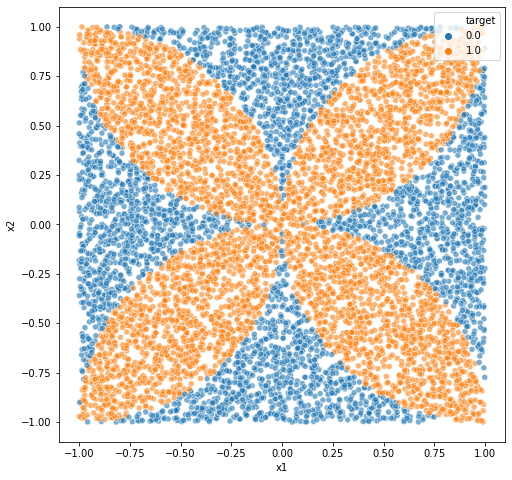

In [0]:
import pandas as pd
import seaborn as sns
points = pd.DataFrame(np.array([x1, x2, target]).transpose(), columns=["x1", "x2", "target"])
plt.figure(figsize=(8, 8))
sns.scatterplot("x1", "x2", data=points, hue="target", alpha=0.6)
plt.show()

In [0]:
points["target"].value_counts()

1.0    4698
0.0    3494
Name: target, dtype: int64

In [0]:
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
acc_score = make_scorer(accuracy_score)
pipeline = Pipeline(steps=[("clf", MLPClassifier(random_state=seed))])
hidden_layer_sizes_list = [(100), (10, 10, 10),
                           (8, 8), (7, 5, 6),
                           (100, 100), (4, 3, 2)]
X_train, X_test, y_train, y_test = train_test_split(points.drop("target", axis=1),
                                                    points["target"], test_size=0.25,
                                                    stratify=points["target"],
                                                    random_state=seed, shuffle=True)
strat_kfold = StratifiedKFold(n_splits=5)
search_space = [
    {
        "clf__hidden_layer_sizes": hidden_layer_sizes_list,
        "clf__activation": ["relu", "logistic", "tanh", "identity"],
        "clf__solver": ["sgd", "adam", "lbfgs"],
        "clf__alpha":  [0.005, 0.1, 0.01, 0.005, 0.0001, 0.00001]
    },
    {
        "clf": [SVC(random_state=seed)],
        "clf__C": [0.5, 0.8, 1.0, 2.0],
        "clf__kernel": ["rbf", "poly", "linear", "sigmoid"],
        "clf__gamma": ["scale", "auto"],
    }
]


In [0]:
clf = GridSearchCV(estimator=pipeline, param_grid=search_space,
                   scoring=acc_score, n_jobs=-1,
                   cv=strat_kfold, return_train_score=True)
clf.fit(X_train, y_train)
results = clf.cv_results_

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [0]:
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix
results = pd.DataFrame(results)
rna = results[results["param_clf__activation"] != "NaN" ].sort_values("mean_test_score", ascending=False)
rna_best = clf.best_estimator_
y_pred_rna = rna_best.predict(X_test)
print(classification_report(y_test, y_pred_rna, digits=4))

              precision    recall  f1-score   support

         0.0     0.9954    0.9874    0.9914       874
         1.0     0.9907    0.9966    0.9936      1174

    accuracy                         0.9927      2048
   macro avg     0.9930    0.9920    0.9925      2048
weighted avg     0.9927    0.9927    0.9927      2048



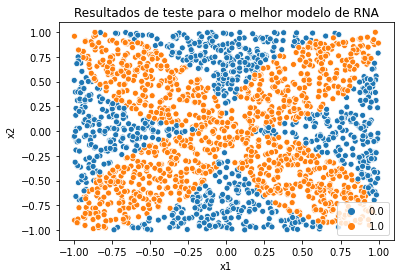

In [0]:
sns.scatterplot(X_test.iloc[:, 0], X_test.iloc[:, 1], hue=y_pred_rna)
plt.legend(loc="best")
plt.title("Resultados de teste para o melhor modelo de RNA")
plt.show()

[]

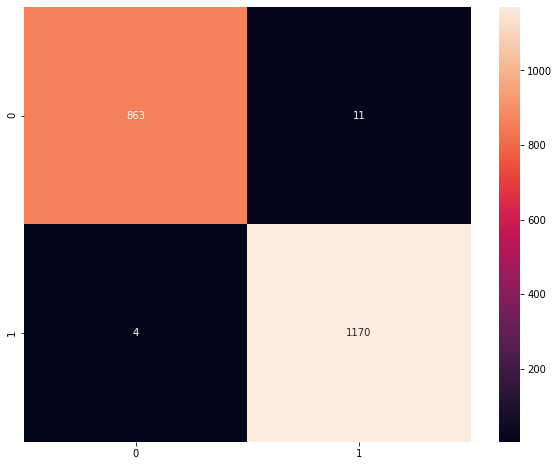

In [0]:
plt.figure(figsize=(10, 8))
cm_rna = confusion_matrix(y_test, y_pred_rna)
sns.heatmap(cm_rna, annot=True, fmt="d")
plt.plot()


In [0]:
svm = results[results["param_clf__activation"].isna()].sort_values("mean_test_score", ascending=False)
svm_best = SVC(random_state=seed, C=svm.iloc[0].params["clf__C"],
               gamma=svm.iloc[0].params["clf__gamma"],
               kernel=svm.iloc[0].params["clf__kernel"])
svm_best.fit(X_train, y_train)
y_pred_svm = svm_best.predict(X_test)
print(classification_report(y_test, y_pred_svm, digits=4))

              precision    recall  f1-score   support

         0.0     0.9647    0.8444    0.9005       874
         1.0     0.8940    0.9770    0.9337      1174

    accuracy                         0.9204      2048
   macro avg     0.9294    0.9107    0.9171      2048
weighted avg     0.9242    0.9204    0.9195      2048



[]

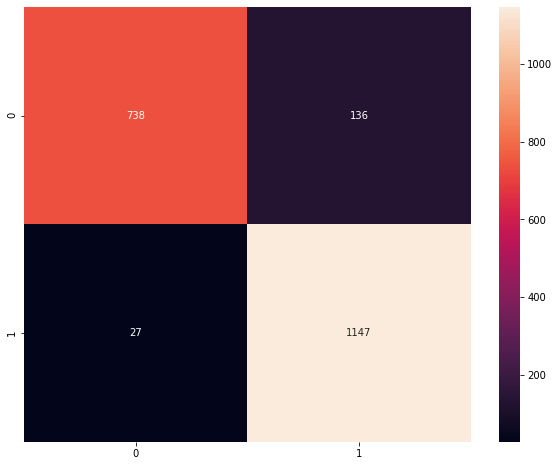

In [0]:
plt.figure(figsize=(10, 8))
cm_svm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(cm_svm, annot=True, fmt="d")
plt.plot()


Now, ploting the graphs to compare performance.

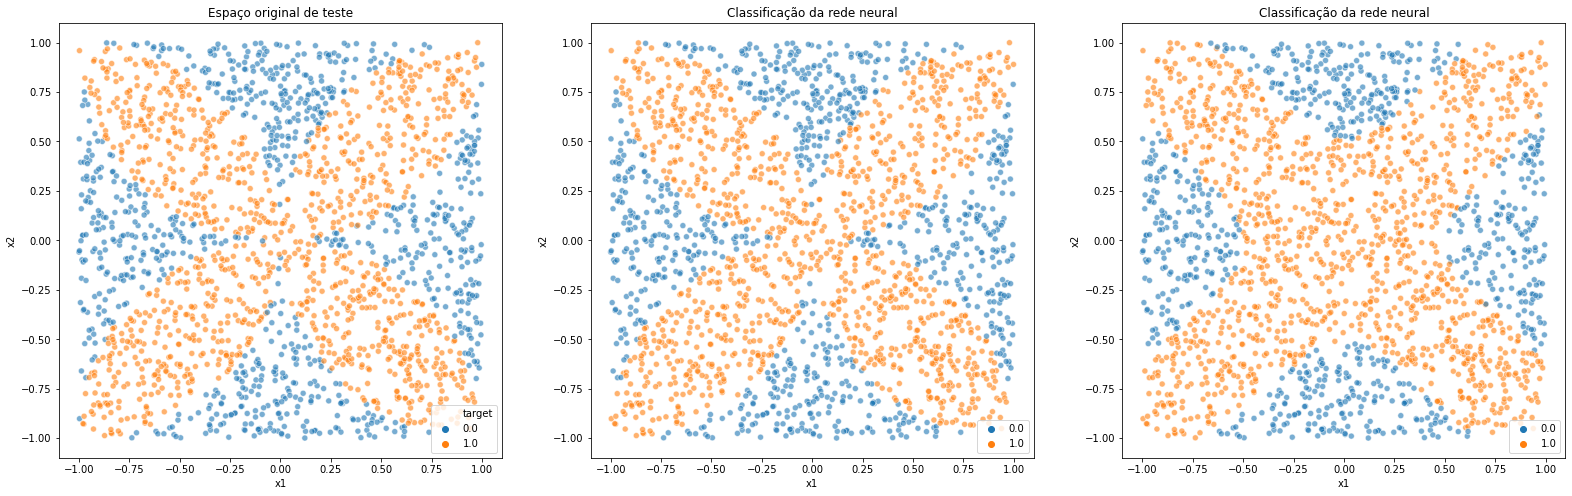

In [0]:
fig, ax = plt.subplots(1, 3)
fig.set_figwidth(27)
fig.set_figheight(8)

sns.scatterplot(X_test["x1"], X_test["x2"], hue=y_test, ax=ax[0], alpha=0.6)
ax[0].title.set_text("Espaço original de teste")


sns.scatterplot(X_test["x1"], X_test["x2"], hue=y_pred_rna, ax=ax[1], alpha=0.6)
ax[1].title.set_text("Classificação da rede neural")

sns.scatterplot(X_test["x1"], X_test["x2"], hue=y_pred_svm, ax=ax[2], alpha=0.6)
ax[2].title.set_text("Classificação da rede neural")
plt.show()